In [2]:
from astroscrappy import detect_cosmics
import numpy as np
import matplotlib.pyplot as plt
import math
#import pyraf
import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from astropy.wcs import wcs
from astropy.visualization import quantity_support

quantity_support()
%matplotlib inline

In [38]:
loc = 'S8/product/'
name1= 's8'
name2 = 'trim'
sci='sci'
sci1='1'
sci2='2'
lamp='arc'
ext='.fits'
trans='cleantrans'
medsig='medsig'
medim = 'med'
ms = 'ext.ms'
varim = 'var.ms'
star = 'star7sub' 
fin = 'cal.ms'
sigim= 'sig.ms'



data_sci1 = fits.getdata(loc+name1+sci+sci1+name2+ext)
header_sci1 = fits.getheader(loc+name1+sci+sci1+name2+ext)
data_sci2 = fits.getdata(loc+name1+sci+sci2+name2+ext)
header_sci2 = fits.getheader(loc+name1+sci+sci2+name2+ext)
data_lamp = fits.getdata(loc+name1+lamp+name2+ext)
header_lamp = fits.getheader(loc+name1+lamp+name2+ext)
data_sci1_trans = fits.getdata(loc+name1+sci+sci1+trans+ext)
header_sci1_trans = fits.getheader(loc+name1+sci+sci1+trans+ext)
data_sci2_trans = fits.getdata(loc+name1+sci+sci2+trans+ext)
header_sci2_trans = fits.getheader(loc+name1+sci+sci2+trans+ext)
data_med = fits.getdata(loc+name1+medim+ext)
header_med = fits.getheader(loc+name1+medim+ext)
data_medsig = fits.getdata(loc+name1+medsig+ext)
header_medsig = fits.getheader(loc+name1+medsig+ext)
data_ms = fits.getdata(loc+name1+ms+ext)
header_ms = fits.getheader(loc+name1+ms+ext)
data_var = fits.getdata(loc+name1+varim+ext)
header_var = fits.getheader(loc+name1+varim+ext)
data_fin = fits.getdata(loc+name1+fin+ext)
header_fin = fits.getheader(loc+name1+fin+ext)
data_sig = fits.getdata(loc+name1+sigim+ext)
header_sig = fits.getheader(loc+name1+sigim+ext)
#data_star = fits.getdata(loc+star+ext)
#header_star = fits.getheader(loc+star+ext)

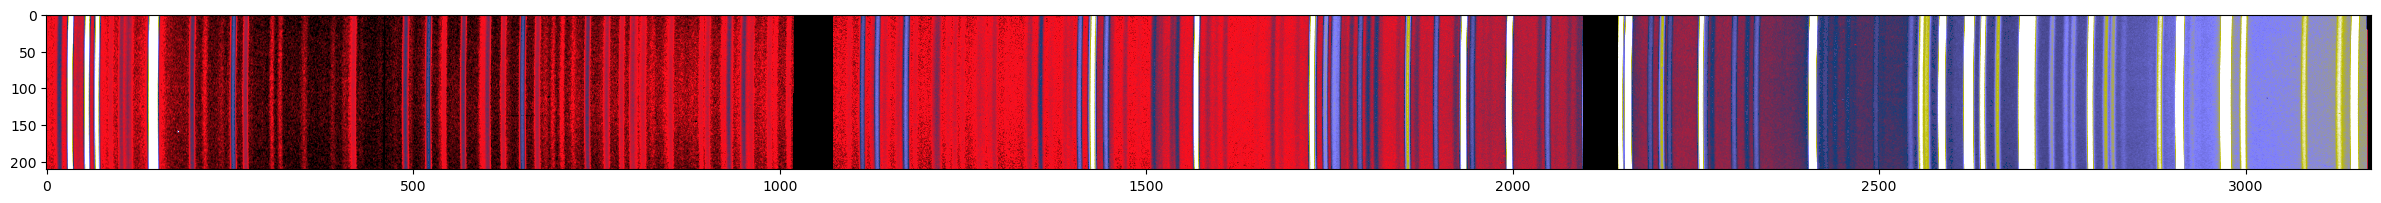

In [10]:
fig = plt.figure(figsize = (30,8))
ax = fig.add_subplot()
im = ax.imshow(data_lamp, cmap='gist_stern',vmin = 100, vmax = 1000)
#cbar = plt.colorbar(im,fraction=0.046, pad=0.032)

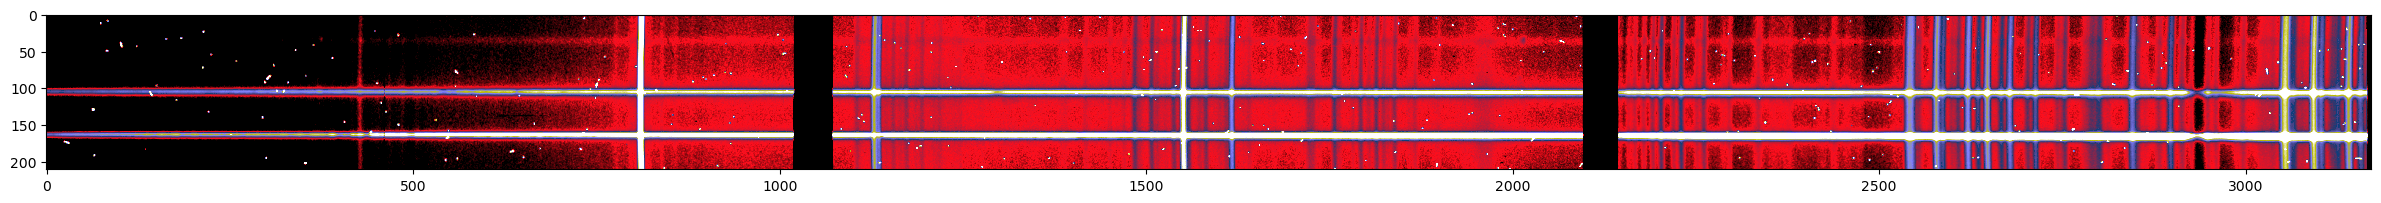

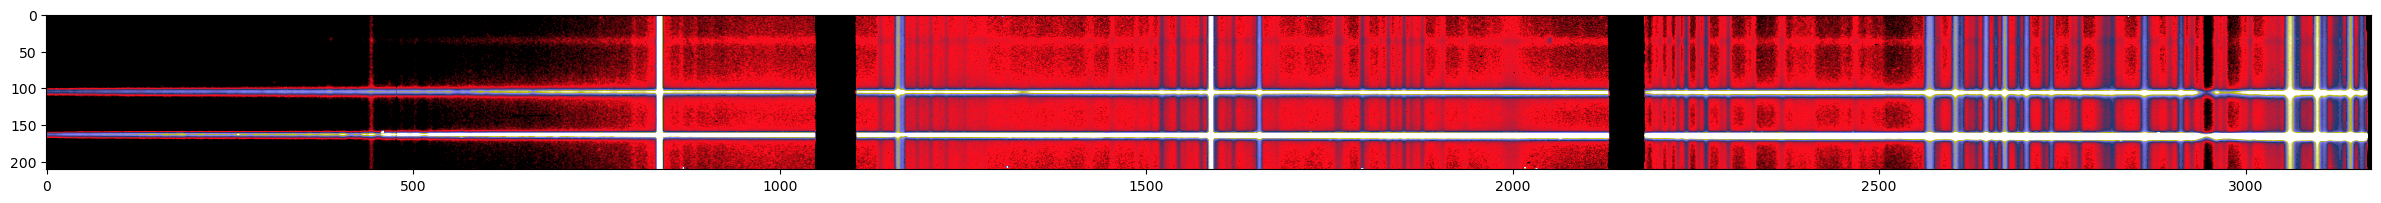

In [18]:
fig = plt.figure(figsize = (30,8))
ax = fig.add_subplot()
im = ax.imshow(data_sci1, cmap='gist_stern',vmin = 100, vmax = 1000)
fig = plt.figure(figsize = (30,8))
ax = fig.add_subplot()
im = ax.imshow(data_sci1_trans, cmap='gist_stern',vmin = 100, vmax = 1000)
#cbar = plt.colorbar(im,fraction=0.046, pad=0.032)

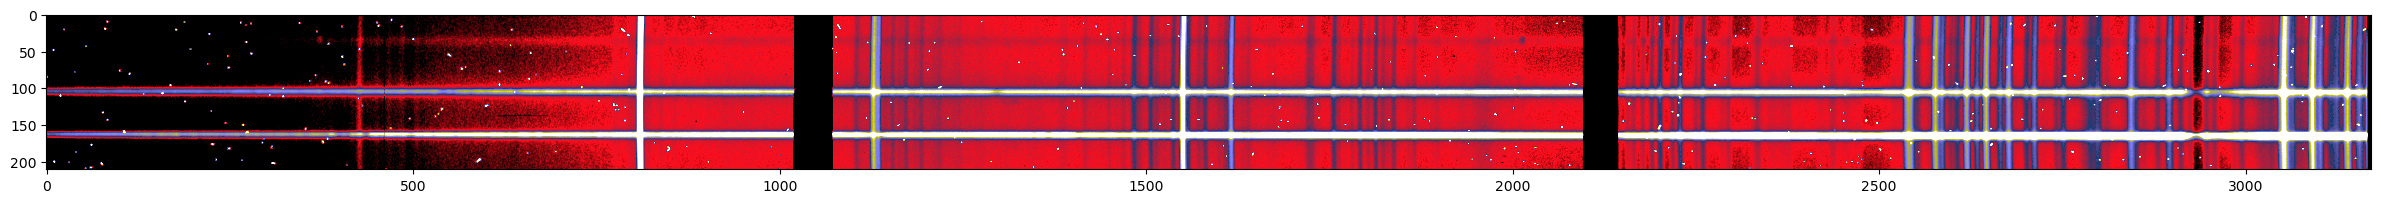

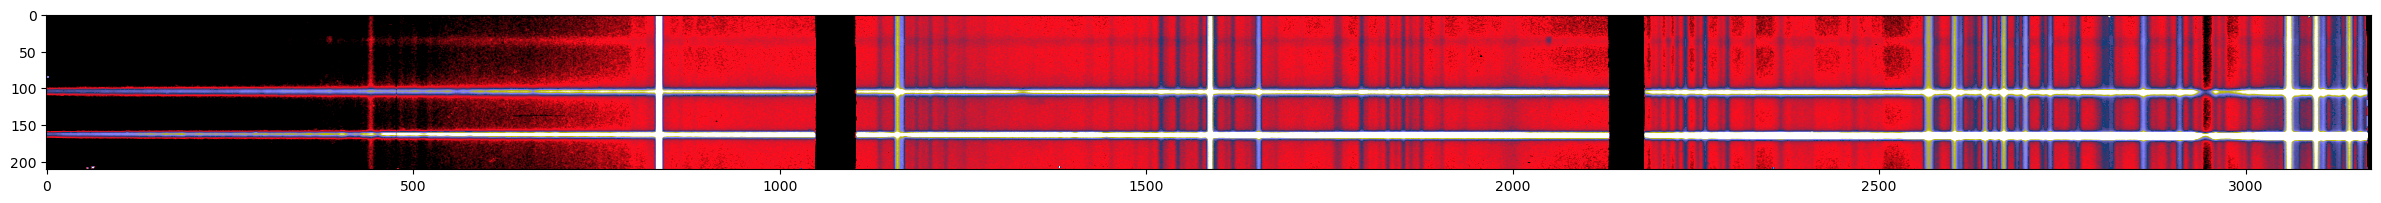

In [19]:
fig = plt.figure(figsize = (30,8))
ax = fig.add_subplot()
im = ax.imshow(data_sci2, cmap='gist_stern',vmin = 100, vmax = 1000)
fig = plt.figure(figsize = (30,8))
ax = fig.add_subplot()
im = ax.imshow(data_sci2_trans, cmap='gist_stern',vmin = 100, vmax = 1000)
#cbar = plt.colorbar(im,fraction=0.046, pad=0.032)

In [13]:
sci1image = np.copy(data_sci1)
sci2image = np.copy(data_sci2)
lampimage = np.copy(data_lamp)

In [14]:
lampcosmic, lampclean = detect_cosmics(lampimage)
sci1cosmic, sci1clean = detect_cosmics(sci1image)
sci2cosmic, sci2clean = detect_cosmics(sci2image)

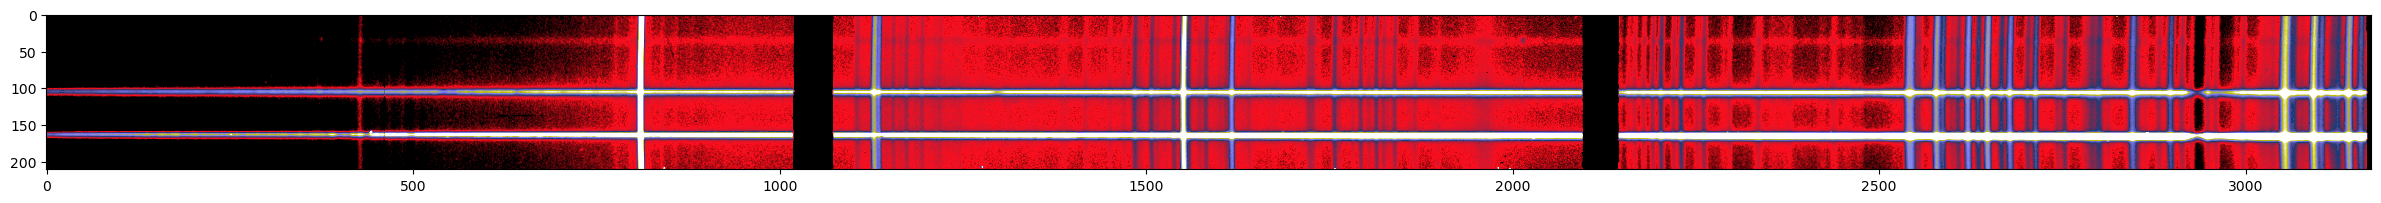

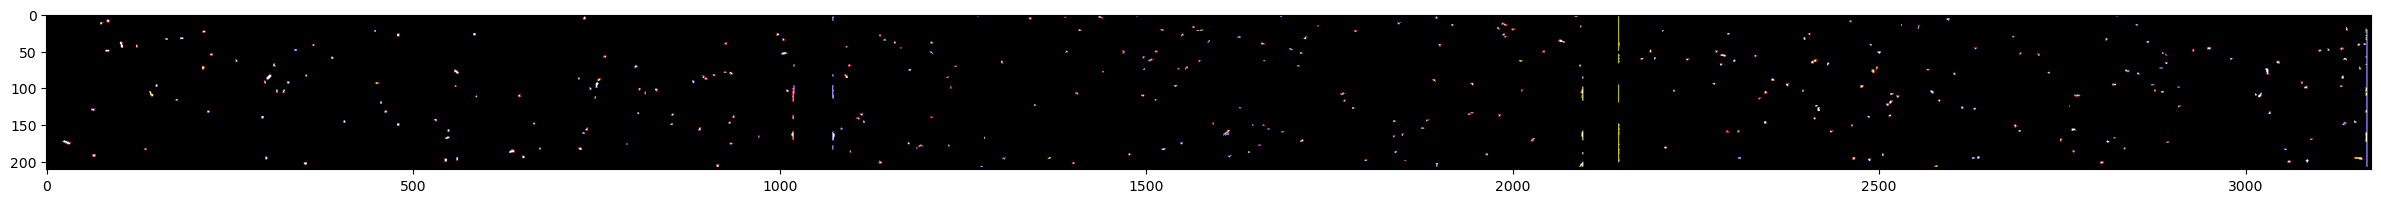

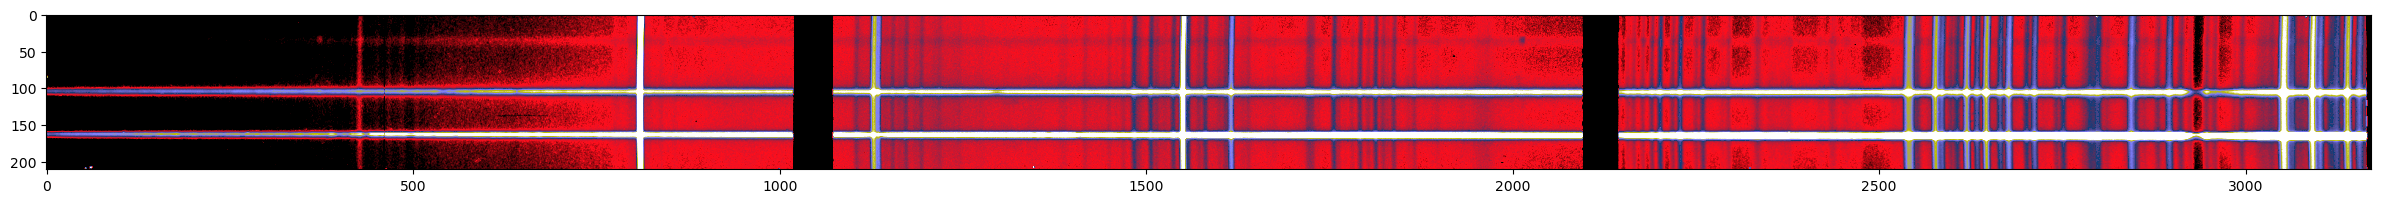

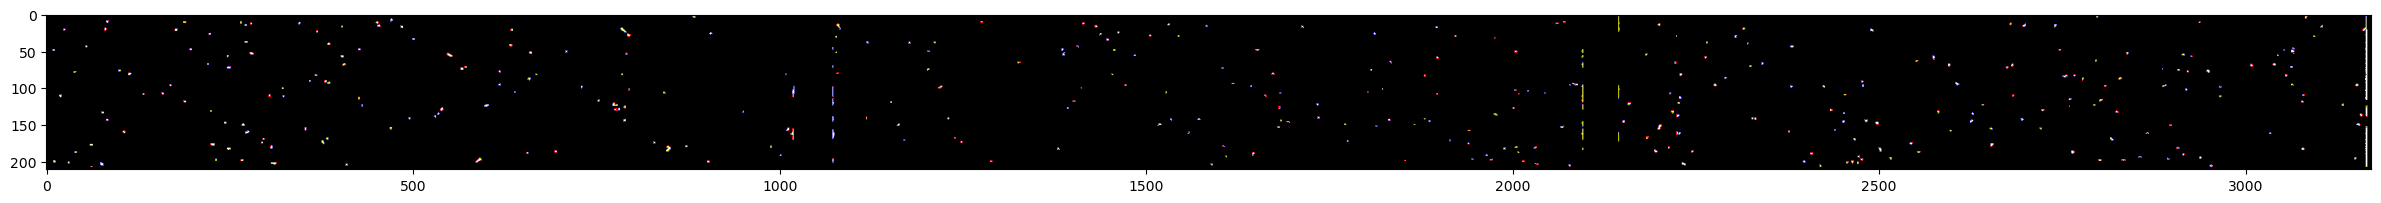

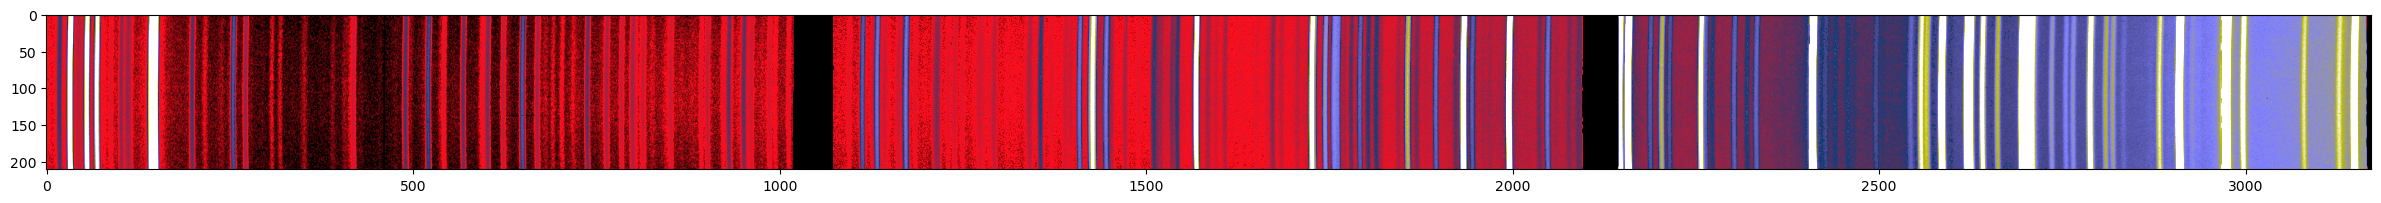

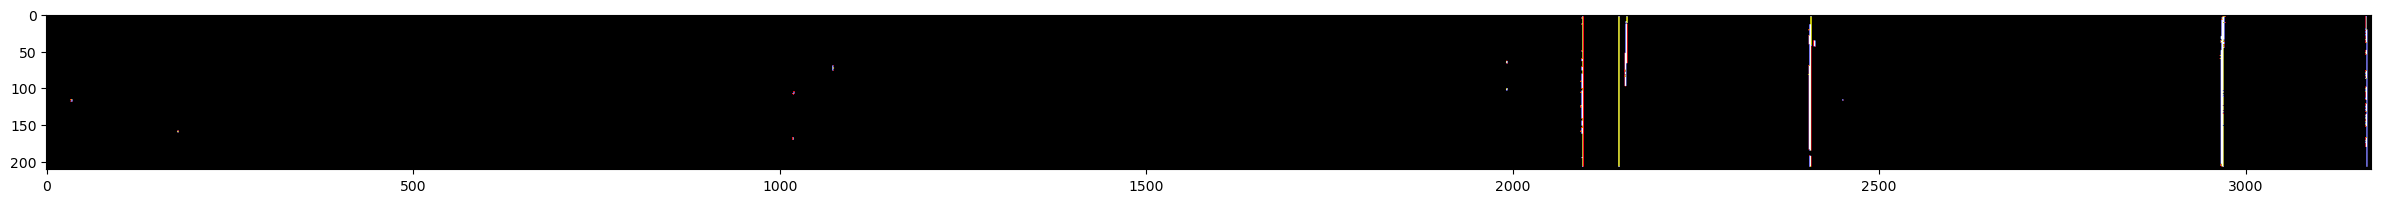

In [15]:
fig = plt.figure(figsize = (30,8))
ax = fig.add_subplot()
im = ax.imshow(sci1clean, cmap='gist_stern',vmin = 100, vmax = 1000)
fig = plt.figure(figsize = (30,8))
ax = fig.add_subplot()
im = ax.imshow(sci1cosmic, cmap='gist_stern')
fig = plt.figure(figsize = (30,8))
ax = fig.add_subplot()
im = ax.imshow(sci2clean, cmap='gist_stern',vmin = 100, vmax = 1000)
fig = plt.figure(figsize = (30,8))
ax = fig.add_subplot()
im = ax.imshow(sci2cosmic, cmap='gist_stern')
fig = plt.figure(figsize = (30,8))
ax = fig.add_subplot()
im = ax.imshow(lampclean, cmap='gist_stern',vmin = 100, vmax = 1000)
fig = plt.figure(figsize = (30,8))
ax = fig.add_subplot()
im = ax.imshow(lampcosmic, cmap='gist_stern')

In [16]:
#hdu = fits.PrimaryHDU(lampclean, header=header_lamp)
#hdu.writeto(loc+name1+lamp+name2+'clean'+ext, overwrite=True)
#hdu = fits.PrimaryHDU(lampcosmic, header=header_lamp)
#hdu.writeto(loc+name1+lamp+name2+'mask'+ext, overwrite=True)
hdu = fits.PrimaryHDU(sci1clean, header=header_sci1)
hdu.writeto(loc+name1+sci+sci1+name2+'clean'+ext, overwrite=True)
#hdu = fits.PrimaryHDU(sci1cosmic, header=header_sci1)
#hdu.writeto(loc+name1+sci+sci1+name2+'mask'+ext, overwrite=True)
hdu = fits.PrimaryHDU(sci2clean, header=header_sci2)
hdu.writeto(loc+name1+sci+sci2+name2+'clean'+ext, overwrite=True)
#hdu = fits.PrimaryHDU(sci2cosmic, header=header_sci2)
#hdu.writeto(loc+name1+sci+sci2+name2+'mask'+ext, overwrite=True)

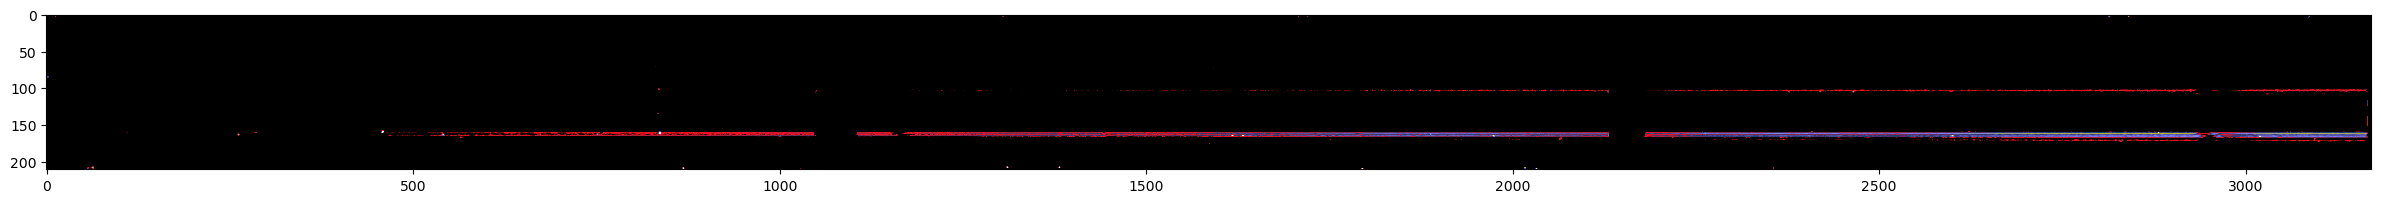

In [22]:
fig = plt.figure(figsize = (30,8))
ax = fig.add_subplot()
im = ax.imshow(data_medsig, cmap='gist_stern',vmin = 100, vmax = 1000)

In [23]:
medsigcp = np.copy(data_medsig)
sqr = medsigcp**2
var = sqr/3

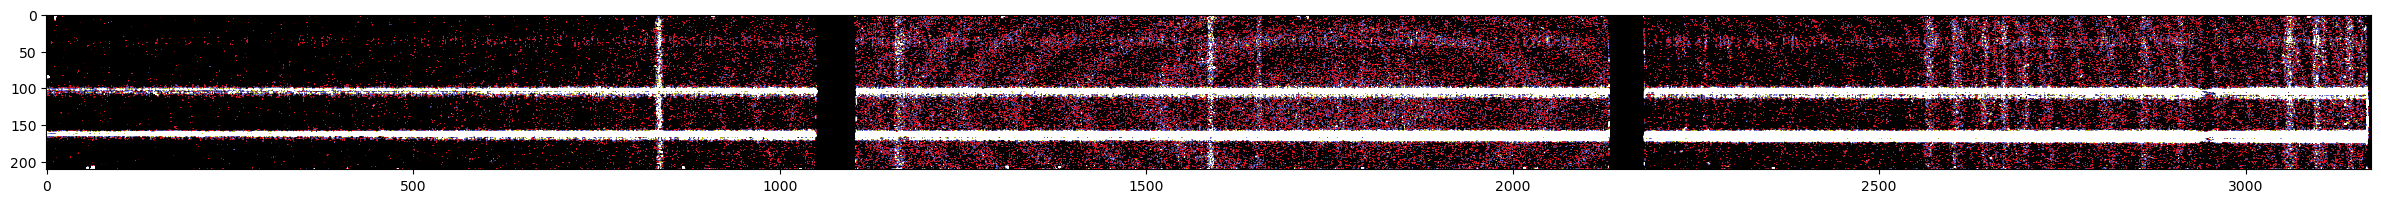

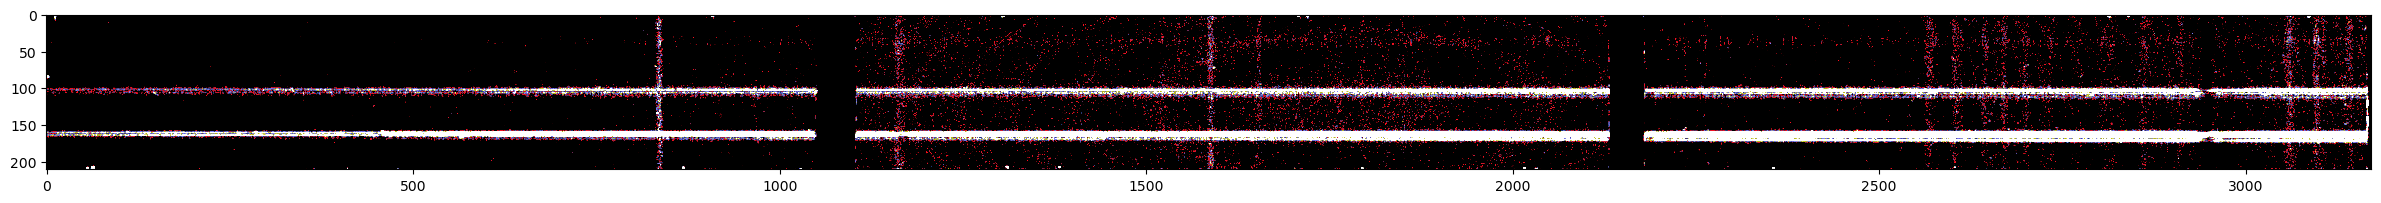

In [24]:
fig = plt.figure(figsize = (30,8))
ax = fig.add_subplot()
im = ax.imshow(sqr, cmap='gist_stern',vmin = 100, vmax = 1000)
fig = plt.figure(figsize = (30,8))
ax = fig.add_subplot()
im = ax.imshow(var, cmap='gist_stern',vmin = 100, vmax = 1000)

In [25]:
header_medsig['st'] = '20:29:27.338'
header_medsig['EXPTIME'] = 1000.138
header_medsig['AIRMASS'] = 1.28896971841819
hdu = fits.PrimaryHDU(var, header=header_medsig)
hdu.writeto(loc+name1+'var'+ext, overwrite=True)

In [ ]:
RA      = '10:59:01.73       ' / Target RA                                      
PM-RA   =                   0. / Proper motion in RA (mas/yr)                   
DEC     = '-09:52:46.80      ' / Target declination                             
PM-DEC  =                   0. / Proper motion in Dec (mas/yr)                  
PA      =              336.000 / Proposed position angle from North (degrees)   
EQUINOX =                 2000 / Equinox of target coordinates                  
EPOCH   =                2000. / Epoch of object RA, Dec                        
DATE-OBS= '2024-05-08'         / Date of observation                            
TIME-OBS= '20:29:27.338'       / UTC start of observation                       
UTC-OBS = '20:29:27.338'       / UTC start of observation                       
TIMESYS = 'UTC     '           / Time system for the TIME-OBS keyword           
LST-OBS = '13:18:10'           / Local SIDT of start of observation             
JD      =     2460439.35378472 / Julian day                                     
EXPTIME =             1000.138 / Exposure time                                  
AIRMASS =     1.28896971841819 / Air mass        

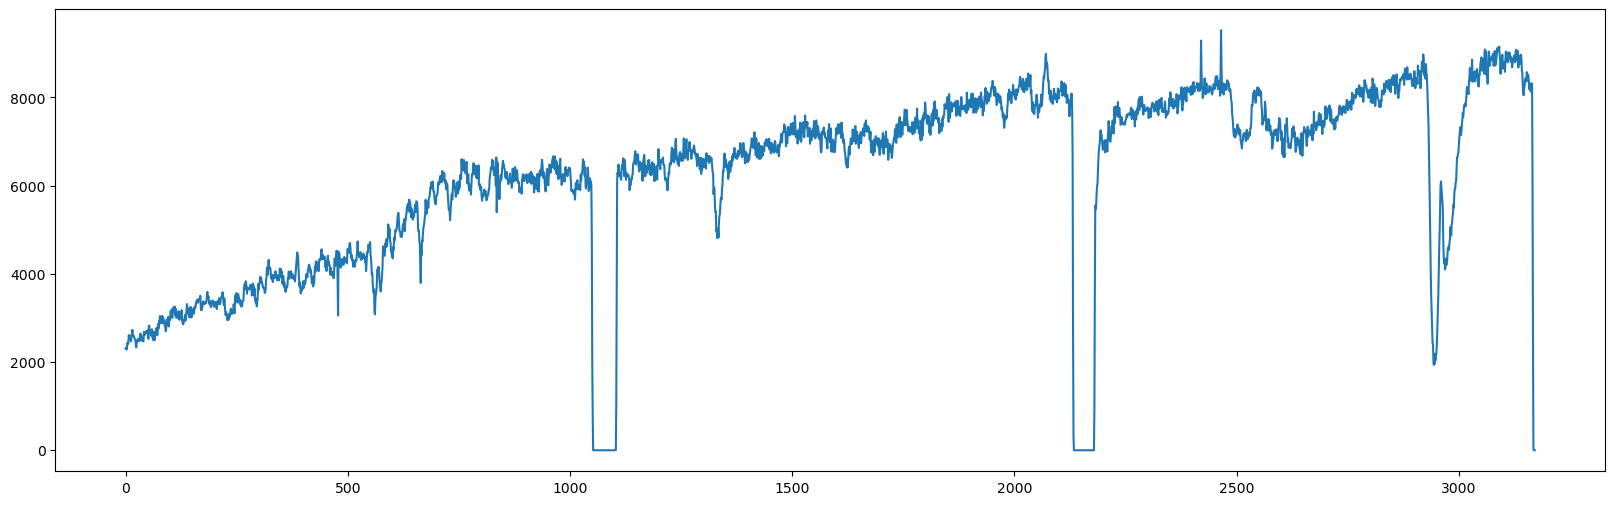

In [31]:
plt.figure(figsize=(20,6))
plt.plot(data_ms)

In [33]:
sig = np.sqrt(data_var)

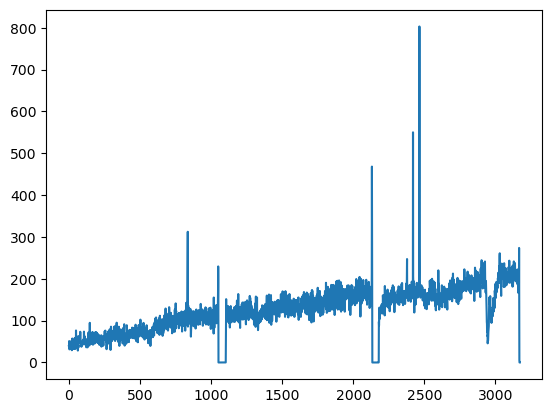

In [34]:
plt.plot(sig)

In [35]:
hdu = fits.PrimaryHDU(sig, header=header_var)
hdu.writeto(loc+name1+'sig.ms'+ext, overwrite=True)

In [ ]:
RA      = '10:59:01.73       ' / Target RA                                                       
DEC     = '-09:52:46.80      ' / Target declination                                             
EPOCH   =                2000. / Epoch of object RA, Dec                        
DATE-OBS= '2024-05-08'         / Date of observation                                                   
UTC-OBS = '20:29:27.338'       / UTC start of observation                       
TIMESYS = 'UTC     '           / Time system for the TIME-OBS keyword                                              
EXPTIME =             1000.138 / Exposure time                                  
AIRMASS =     1.28896971841819 / Air mass    

In [26]:
header_med['st'] = '20:29:27.338'
header_med['EXPTIME'] = 1000.138
header_med['AIRMASS'] = 1.28896971841819

In [27]:
hdu = fits.PrimaryHDU(data_med, header=header_med)
hdu.writeto(loc+name1+medim+ext, overwrite=True)

In [43]:
header_sig['RA'] = '10:59:01.73'
header_sig['DEC'] = '-09:52:46.80'
header_sig['UT'] = '20:29:27.338'
header_sig['DATE-OBS'] = '2024-05-08'
header_sig['EPOCH'] = 2000
header_sig['OBSERVATORY'] = 'SAAO'

In [47]:
hdu = fits.PrimaryHDU(data_ms, header=header_ms)
hdu.writeto(loc+name1+ms+ext, overwrite=True)

In [139]:
header_star['st'] = '17:23:00.093'
header_star['EXPTIME'] = 60.139
header_star['AIRMASS'] = 1.24058879477473
hdu = fits.PrimaryHDU(data_star, header=header_star)
hdu.writeto(loc+star+ext, overwrite=True)

In [ ]:
TIME-OBS= '17:04:44.788'       / UTC start of observation                       
UTC-OBS = '17:04:44.788'       / UTC start of observation                       
TIMESYS = 'UTC     '           / Time system for the TIME-OBS keyword           
LST-OBS = '09:52:57'           / Local SIDT of start of observation             
JD      =     2460443.21162037 / Julian day                                     
EXPTIME =               60.135 / Exposure time                                  
AIRMASS =     1.24723636366376 / Air mass

    x1 =      4774., x2 =      7823., dx =     0.9613, nx = 3172, xlog = no
    hb= 4861 ha = 6564.6 

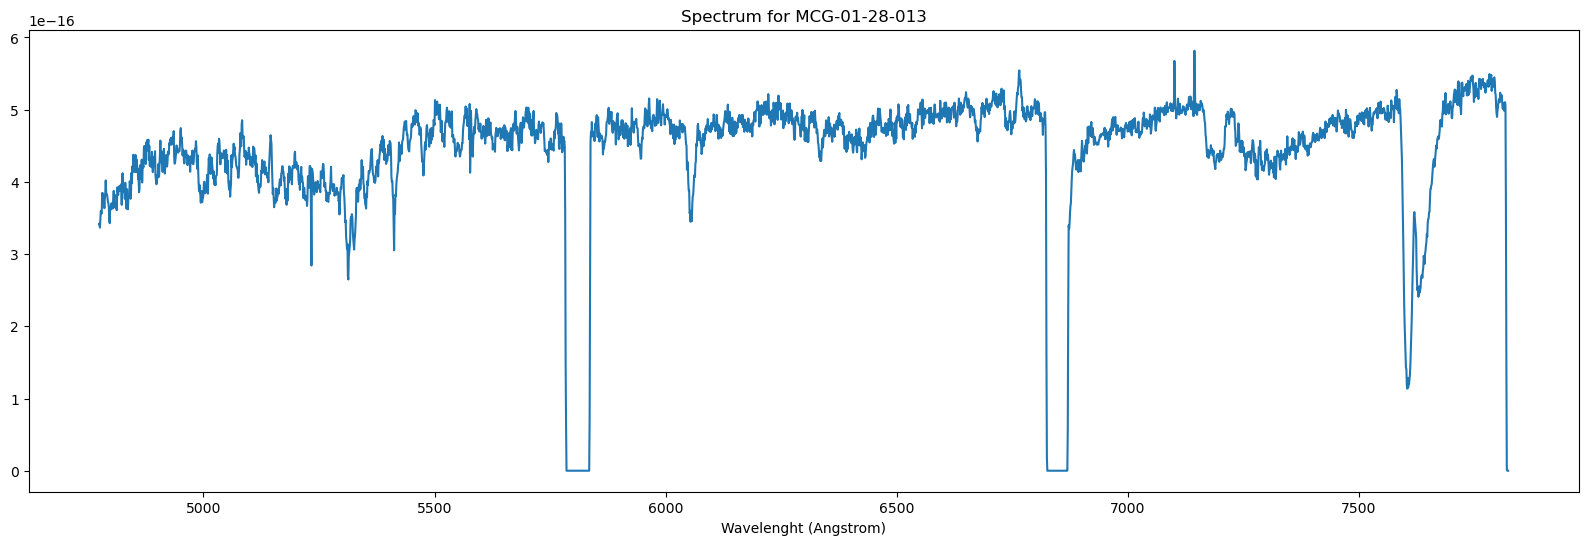

In [42]:
l=np.linspace(4774, 7823, num=3172)
plt.figure(figsize=(20,6))
plt.plot(l,data_fin)
plt.title("Spectrum for MCG-01-28-013")
plt.xlabel("Wavelenght (Angstrom)")
#plt.savefig('013spec.pdf',  bbox_inches='tight')